## ASSIGNMENT5

## NALLAKALVA RISHITHA REDDY

## 700742428

1. Principal Component Analysis
a. Apply PCA on CC dataset.
b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score
has improved or not?
c. Perform Scaling+PCA+K-Means and report performance.

In [25]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

In [5]:
dataset = pd.read_csv('CC.csv')
#print dataset 
dataset.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
dataset["CREDIT_LIMIT"].fillna(dataset["CREDIT_LIMIT"].mean(),inplace=True)
dataset["MINIMUM_PAYMENTS"].fillna(dataset["MINIMUM_PAYMENTS"].mean(),inplace=True)
#data x is taking the second column by eliminating first colum  as described by :,
data_x = dataset.iloc[:,1:]
#data y is taking the last column by not assuming the starting columns as we have taken -1
data_y = dataset.iloc[:,-1]
#kmean cluster fitting to dataset
k_mean = KMeans(n_clusters=2)
k_mean.fit(data_x)
#predicting the kmean value using location of datasets
cluster_km = k_mean.predict(data_x)

In [19]:
score = metrics.silhouette_score(data_x, cluster_km)
#printing before silhouette score using dataset xlocation and cluster kmean 
print("Before score :\n",score)

Before score :
 0.511639269641848


In [21]:
#PCA data to be transformed and showing it in a table 
pca_data = PCA(2)
A_pca = pca_data.fit_transform(x)
# forming the dataframe by principal components and concating the two dataframes
data_frame2 = pd.DataFrame(data=A_pca, columns = ['component A', 'component B' ])
last_dataframe = pd.concat([data_frame2,dataset[['TENURE']]],axis=1)
#printing the data frame as final dataframe and displaying it
print(last_dataframe.head())

   component A  component B  TENURE
0 -4326.383956   921.566884      12
1  4118.916676 -2432.846347      12
2  1497.907660 -1997.578692      12
3  1394.548556 -1488.743450      12
4 -3743.351874   757.342659      12


In [23]:
#kmean & silhotte score on result of PCA
kmean = KMeans(n_clusters=2)
kmean.fit(A_pca)
cluster_km = kmean.predict(A_pca)
silhouette_score = metrics.silhouette_score(A_pca, cluster_km)
#silhouette score on pca result
print("PCA RESULT",silhouette_score)

PCA RESULT 0.5980170297658036


In [28]:
# standard scaling
stand_scaler = preprocessing.StandardScaler()
stand_scaler.fit(x)
A_scaled_arr = stand_scaler.transform(x)
A_scaled = pd.DataFrame(A_scaled_arr, columns = x.columns)
pca = PCA(2)
A_pca = pca.fit_transform(A_scaled)
data_frame2 = pd.DataFrame(data=A_scaled , columns = ['component 1', 'component 2' ])
After_scaling = pd.concat([data_frame2,dataset[['TENURE']]],axis=1)
print(After_scaling.head())

   component 1  component 2  TENURE
0          NaN          NaN      12
1          NaN          NaN      12
2          NaN          NaN      12
3          NaN          NaN      12
4          NaN          NaN      12


In [31]:
#silhoeutte score after scaling
kmean = KMeans(n_clusters=2)
kmean.fit(A_scaled)
cluster_km = km.predict(A_scaled)
Silhoeutte_score = metrics.silhouette_score(A_scaled, cluster_km)
print("After Scaling :", score)

After Scaling : 0.20942403607852225


2. Use pd_speech_features.csv
a. Perform Scaling
b. Apply PCA (k=3)
c. Use SVM to report performance


In [51]:
import pandas as pd 
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings

In [45]:
warnings.filterwarnings('always')
df = pd.read_csv('pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [38]:
Empty_values = dataframe.isnull().sum()
# printing null values in the dataframe 
print("NULL Vals: ", Empty_values)
#dataset locations display
x_ds = dataset.iloc[:,1:]
y_ds = dataset.iloc[:,-1]

NULL Vals:  id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [40]:
#applying scaling
stand_scaler = preprocessing.StandardScaler()
stand_scaler.fit(x_ds)
A_scaled_array = stand_scaler.transform(x_ds)
A_scaled = pd.DataFrame(A_scaled_array, columns = x.columns)

In [46]:
#applying k=3 in pca
pca = PCA(3)
A_pca = pca.fit_transform(A_scaled)
print("PCA: \n", A_pca)
# forming the dataframe by principal components and concating the two dataframes
dataframe2 = pd.DataFrame(data = A_pca, columns = [' component 1', ' component 2' , " component 3"])
finaldatafrrame = pd.concat([dataframe2, df[['class']]], axis = 1)
print("Final DataFrame: \n",finaldatafrrame.head())

PCA: 
 [[-1.68222016 -1.07645008  0.48842456]
 [-1.13829361  2.50648401  0.600998  ]
 [ 0.96968378 -0.38352172  0.10236367]
 ...
 [-0.92620412 -1.8107884  -0.47473166]
 [-2.33655215 -0.65796873  0.97478569]
 [-0.55642237 -0.40046813  1.01540034]]
Final DataFrame: 
     component 1   component 2   component 3  class
0     -1.682220     -1.076450      0.488425    1.0
1     -1.138294      2.506484      0.600998    1.0
2      0.969684     -0.383522      0.102364    1.0
3     -0.873627      0.043169      1.460031    1.0
4     -1.599434     -0.688582      0.365048    1.0


In [53]:
#svc on the pca result
X_training, X_testing, y_training, y_testing = train_test_split(A_pca, y, test_size = 0.2, random_state = 0)
svc = SVC()
svc.fit(X_training, y_training)
B_prediction = svc.predict(X_testing)
print("Report on SVC Classification: \n",classification_report(y_testing, B_prediction))
accurate_svc = svc.score(X_training, y_training)
print("svm precision =", accurate_svc)
#utilizing the train-test split method to divide the dataset

C:\Users\India\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\India\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\India\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report on SVC Classification: 
               precision    recall  f1-score   support

           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        37
          10       0.00      0.00      0.00        52
          11       0.00      0.00      0.00        63
          12       0.86      1.00      0.92      1538

    accuracy                           0.86      1790
   macro avg       0.12      0.14      0.13      1790
weighted avg       0.74      0.86      0.79      1790

svm precision = 0.8444134078212291


3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Reading the iris.csv dataset
iris_dataset = pd.read_csv('Iris.csv')
#printing iris dataset 
print(iris_dataset.head())
#dataset locations getting the columns based on the values declared
x_ds = iris_dataset.iloc[:, :-1]
y_ds= iris_dataset.iloc[:, -1]

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


PCA final DF: 
    component1  component2      Species
0   74.547527    0.441426  Iris-setosa
1   73.549143    0.309342  Iris-setosa
2   72.557120    0.084528  Iris-setosa
3   71.551791    0.160353  Iris-setosa
4   70.552763    0.227636  Iris-setosa


C:\Users\India\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\India\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


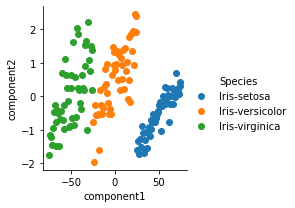

In [77]:
# PCA
pca = PCA(2)
A_iris = pca.fit_transform(x_ds)
# forming the dataframe by principal components and concating the two dataframes
iris_pca_dataframe = pd.DataFrame(data = A_iris, columns = ['component1', 'component2'])
final_dataframe = pd.concat([iris_pca_dataframe, iris_dataset[['Species']]], axis = 1)
#printing the final dataframe of PCA
print("PCA final DF: \n",final_dataframe.head())
# visualization for PCA
sn.FacetGrid(final_dataframe, hue="Species").map(plt.scatter, 'component1', 'component2').add_legend()
#plotting the graph based on the dataframe generated
plt.show()

   component1  component2      Species
0   10.036763   -0.451330  Iris-setosa
1    9.172930   -1.477234  Iris-setosa
2    9.480989   -0.979693  Iris-setosa
3    8.818119   -1.408602  Iris-setosa
4    9.960200   -0.112546  Iris-setosa


C:\Users\India\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\India\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


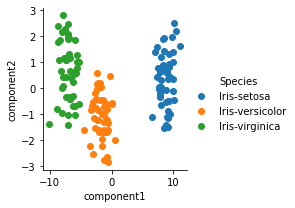

In [79]:
# Linear Discriminant Analysis (LDA)
LinearDiscriminantAnalysisss = LinearDiscriminantAnalysis(n_components=2)
lda_analysis = LinearDiscriminantAnalysisss.fit(x, y).transform(x)
# forming the dataframe by principal components and concating the two dataframes
iris_LinearDiscriminantAnalysis_df = pd.DataFrame(data = lda_analysis, columns = ['component1', 'component2'])
lda_df = pd.concat([iris_LinearDiscriminantAnalysis_df, iris_dataset[['Species']]], axis = 1)
print(lda_df.head())
# LDA visualization
sn.FacetGrid(lda_df, hue="Species").map(plt.scatter, 'component1', 'component2').add_legend()
#plotting the graph based on the dataframe generated
plt.show()

4. Briefly identify the difference between PCA and LDA

Both LDA and PCA are used to reduce the number of features. However, while LDA is supervised and will take target values into consideration as well, PCA is based on unsupervised learning and will not consider class labels. LDA also creates a new linear axis, strives for maximum categorization separability, and projects data points on that axis. We can conclude that LDA offers superior feature reduction for labelled data than PCA based on the visuals below.